In [3]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 단순선형회귀

step: 0 W: [0.78899646] b: [0.43048206] cost: 12.47763


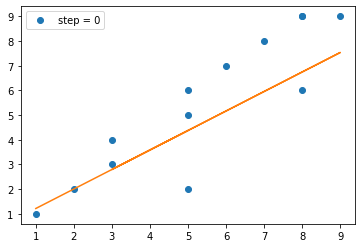

step: 30 W: [0.94937354] b: [0.41367194] cost: 1.4802889


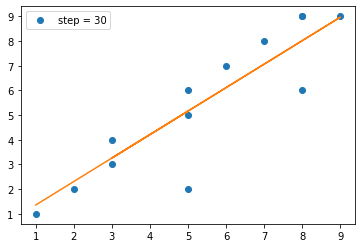

step: 60 W: [0.95502764] b: [0.37701726] cost: 1.4756763


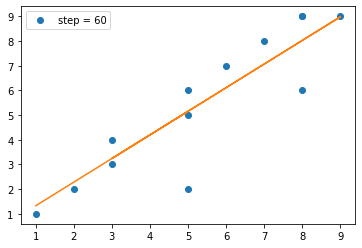

step: 90 W: [0.96013445] b: [0.343911] cost: 1.4719137


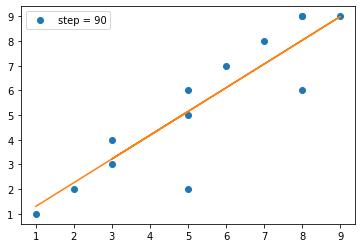

In [38]:
# 데이터 생성  
X = [1, 2, 3,5,5,6,7,8,8,9,8,3,5]
Y = [1, 2, 3,5,6,7,8,9,9,9,6,4,2]

# W,b 변수 초기화
W = tf.Variable(tf.random_uniform([1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')
hypothesis = X * W + b
cost = tf.reduce_mean(tf.square(hypothesis - Y))

############
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)
  
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())
    
    for step in range(100):
        _, W_val,b_val, c_val = sess.run([train, W,b, cost])
        if step % 30 == 0:
            print('step:',step,'W:',W_val,'b:', b_val,'cost:',c_val)
            plt.plot(X,Y,'o', label='step = {}'.format(step))
            plt.plot(X,W_val*X+b_val)
            plt.legend()
            plt.show()

### 선형회귀 - sklearn load_breast_cancer() 활용

In [12]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
cancer=load_breast_cancer()

In [19]:
XY = pd.DataFrame(cancer.data,columns=cancer.feature_names)

step: 0 W: [10.326362] b: [91.96422] cost: 8996.102


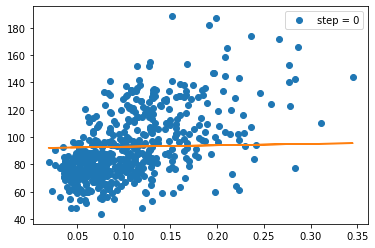

step: 3000 W: [256.18176] b: [65.23879] cost: 406.58304


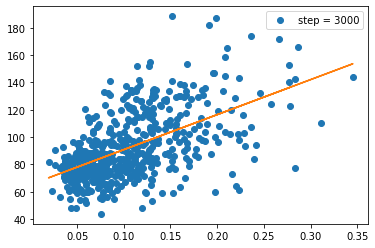

step: 6000 W: [256.2391] b: [65.232796] cost: 406.583


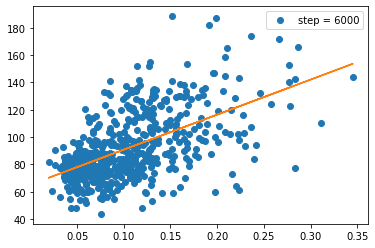

step: 9000 W: [256.2391] b: [65.232796] cost: 406.583


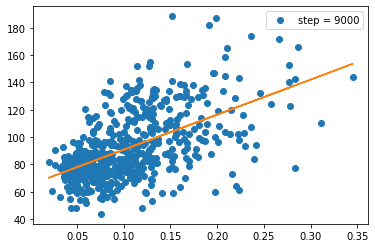

In [35]:
X = np.array(XY.iloc[:,5])
Y = np.array(XY.iloc[:,2])

#W = tf.Variable(-3.0)
W = tf.Variable(tf.random_uniform([1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')
hypothesis = X * W + b
cost = tf.reduce_mean(tf.square(hypothesis - Y))

############
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)
train = optimizer.minimize(cost)

  
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())
    
    for step in range(10000):
        _, W_val,b_val, c_val = sess.run([train, W,b, cost])
        if step % 3000 == 0:
            print('step:',step, 'W:',W_val,'b:', b_val,'cost:',c_val)
            plt.plot(X,Y,'o', label='step = {}'.format(step))
            plt.plot(X,W_val*X+b_val)
            plt.legend()
            plt.show()